<a href="https://colab.research.google.com/github/AIandAutomationTools/ai-quartet-evaluator/blob/main/ai_quartet_pitch_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

professor_url = os.environ.get("professor_url", None)
student_url = os.environ.get("student_url", None)

print("Professor URL:", professor_url)
print("Student URL:", student_url)


In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import requests
import io

def load_audio_from_url(url):
    response = requests.get(url)
    audio_data, sr = librosa.load(io.BytesIO(response.content), sr=None)
    return audio_data, sr

# Load audio
prof_audio, sr1 = load_audio_from_url(professor_url)
stud_audio, sr2 = load_audio_from_url(student_url)

# Resample if needed
if sr1 != sr2:
    stud_audio = librosa.resample(stud_audio, orig_sr=sr2, target_sr=sr1)
    sr2 = sr1

# Extract pitch
prof_pitch, _ = librosa.pyin(prof_audio, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
stud_pitch, _ = librosa.pyin(stud_audio, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))

# Plot pitch comparison
plt.figure(figsize=(14, 5))
plt.plot(prof_pitch, label='Professor Pitch', alpha=0.75)
plt.plot(stud_pitch, label='Student Pitch', alpha=0.75)
plt.legend()
plt.title("Pitch Comparison")
plt.xlabel("Frame")
plt.ylabel("Pitch (Hz)")
plt.show()

# Basic pitch error analysis
prof_pitch_clean = np.nan_to_num(prof_pitch)
stud_pitch_clean = np.nan_to_num(stud_pitch)
pitch_diff = np.abs(prof_pitch_clean - stud_pitch_clean)
avg_error = np.mean(pitch_diff)

print(f"\n🎵 Average pitch difference: {avg_error:.2f} Hz")
if avg_error < 20:
    print("🎯 Great job! Your pitch closely matches the reference.")
elif avg_error < 50:
    print("👍 You're in the ballpark, but there’s room for improvement.")
else:
    print("⚠️ Your pitch deviates significantly. Focus on tuning and accuracy.")


In [ ]:
# Install dependencies
!pip install librosa matplotlib numpy requests

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import requests
import io

def load_audio_from_url(url):
    response = requests.get(url)
    audio_data, sr = librosa.load(io.BytesIO(response.content), sr=None)
    return audio_data, sr

In [ ]:
from urllib.parse import parse_qs
from IPython.display import Javascript
import IPython

# Parse query parameters from the URL
# query_params = parse_qs(IPython.display.get_ipython().user_ns.get('IPython').get_ipython().getoutput('echo $COLAB_GPU'))
params_code = """
IPython.notebook.kernel.execute('params = ' + JSON.stringify(Object.fromEntries(new URLSearchParams(window.location.search))))
"""
display(Javascript(params_code))



# Load audio
prof_audio, sr1 = load_audio_from_url(professor_url)
stud_audio, sr2 = load_audio_from_url(student_url)

# Resample if needed
if sr1 != sr2:
    stud_audio = librosa.resample(stud_audio, orig_sr=sr2, target_sr=sr1)
    sr2 = sr1

In [ ]:
try:
    professor_url = params.get('professor_url', [''])[0]
    student_url = params.get('student_url', [''])[0]
    print("Professor URL:", professor_url)
    print("Student URL:", student_url)
except:
    print("Could not retrieve URLs from the link. Please make sure it contains ?student_url=...&professor_url=...")


Professor URL: 
Student URL: 


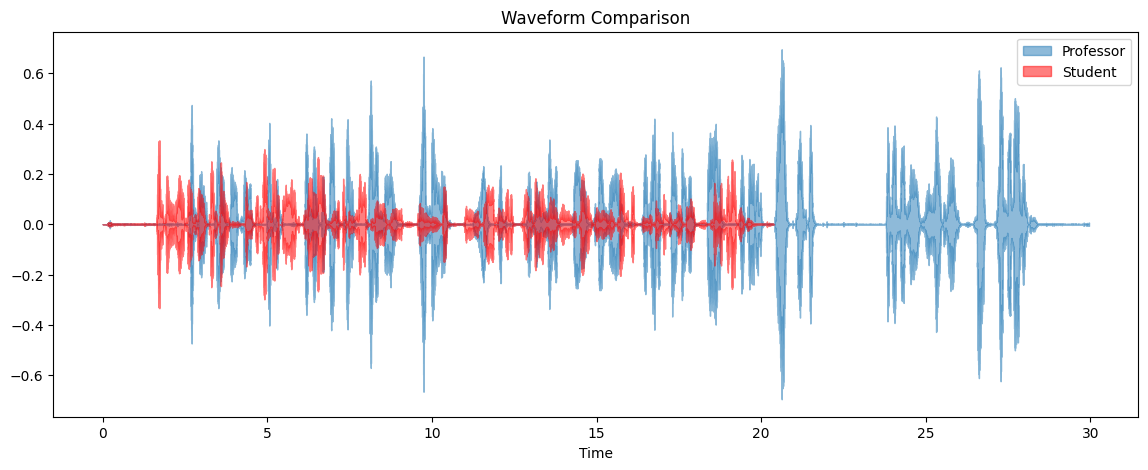

In [ ]:
# Plot waveforms
plt.figure(figsize=(14, 5))
librosa.display.waveshow(prof_audio, sr=sr1, alpha=0.5, label='Professor')
librosa.display.waveshow(stud_audio, sr=sr2, alpha=0.5, color='r', label='Student')
plt.title("Waveform Comparison")
plt.legend()
plt.show()

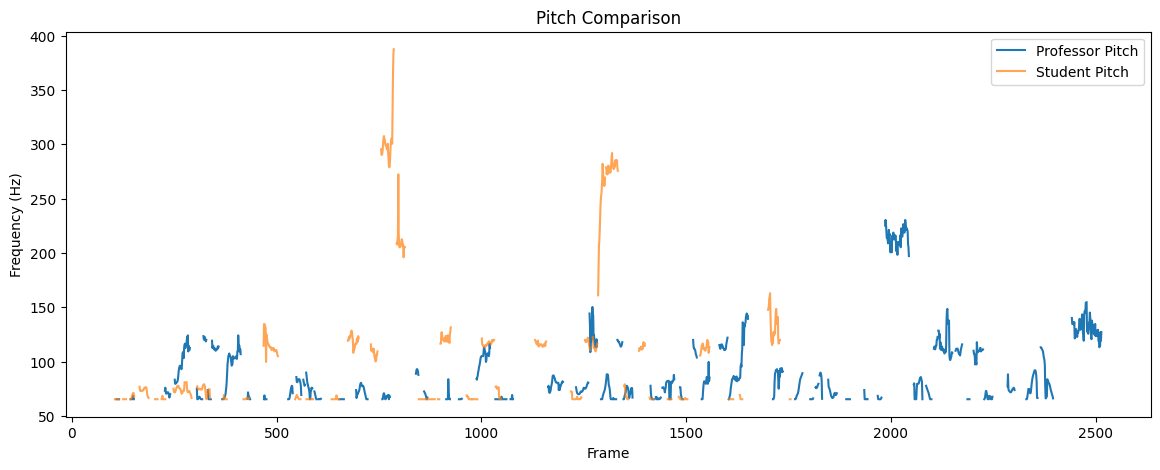

In [ ]:
# Extract pitch (fundamental frequency)
prof_pitch, voiced_flag, voiced_probs = librosa.pyin(prof_audio, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
stud_pitch, voiced_flag, voiced_probs = librosa.pyin(stud_audio, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))


# Create pitch comparison plot
plt.figure(figsize=(14, 5))
plt.plot(prof_pitch, label='Professor Pitch')
plt.plot(stud_pitch, label='Student Pitch', alpha=0.7)
plt.title("Pitch Comparison")
plt.xlabel("Frame")
plt.ylabel("Frequency (Hz)")
plt.legend()
plt.show()

In [ ]:
# Compare average pitch values
prof_avg = np.nanmean(prof_pitch)
stud_avg = np.nanmean(stud_pitch)
pitch_diff = abs(prof_avg - stud_avg)
print(f"Professor Avg Pitch: {prof_avg:.2f} Hz")
print(f"Student Avg Pitch: {stud_avg:.2f} Hz")
print(f"Pitch Difference: {pitch_diff:.2f} Hz")

# Feedback
if pitch_diff < 20:
    print("✅ Great job! Student pitch closely matches the professor.")
elif pitch_diff < 50:
    print("🟡 Good attempt, but noticeable pitch differences.")
else:
    print("🔴 Consider practicing more to match the pitch.")

Professor Avg Pitch: 93.53 Hz
Student Avg Pitch: 111.79 Hz
Pitch Difference: 18.25 Hz
✅ Great job! Student pitch closely matches the professor.
